In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')


In [3]:
# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# Fill missing values in 'director', 'cast', and 'country' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


In [13]:
# Before converting the date, simply clear the spaces with .str.strip()
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')


In [14]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

In [15]:
# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

**Data Visualization**

Now, let's visualize some insights:

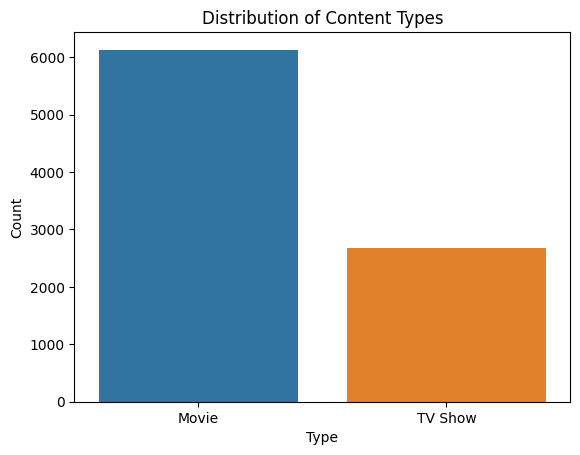

In [16]:
# Distribution of Content Types
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


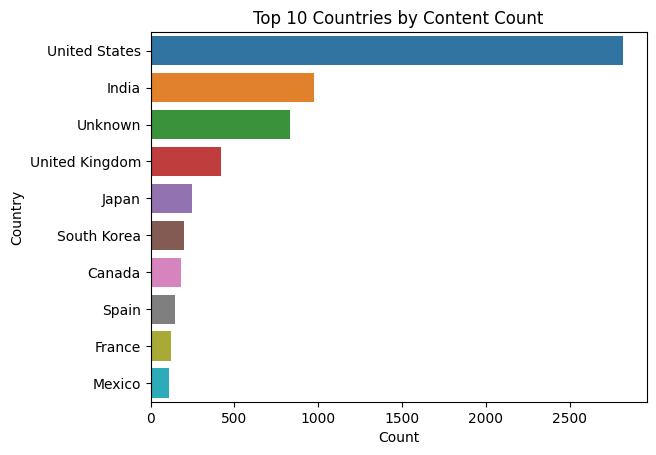

In [17]:
# Top 10 Countries by Content Count
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


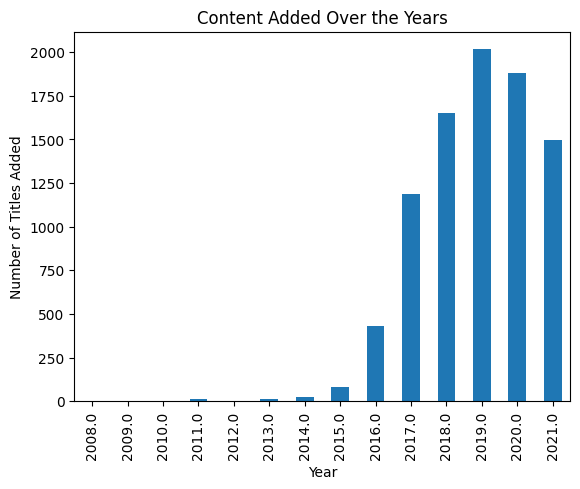

In [18]:
# Content Added Over the Years
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()


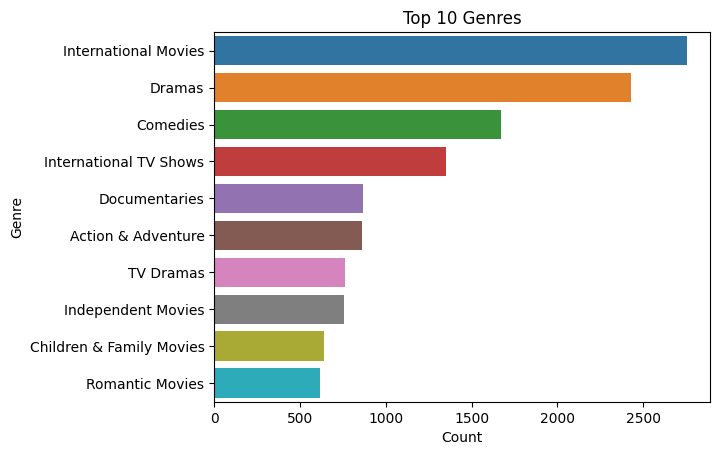

In [19]:
# Top 10 Genres
# Split the 'listed_in' column and explode the list
df_genres = df['listed_in'].str.split(', ').explode()
top_genres = df_genres.value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


## 📊 Summary of Analysis

In this notebook, we performed exploratory data analysis on the Netflix dataset from Kaggle. Here's a breakdown of what we did:

- Loaded the dataset and inspected its structure using `.info()`, `.head()`, and `.describe()`.
- Handled missing values in the `director`, `cast`, and `country` columns by filling them with `'Unknown'`.
- Cleaned the `date_added` column by stripping whitespace and converting it to `datetime` format.
- Explored the dataset further using visualizations and aggregations (e.g., content types, release years, countries, and genres).
